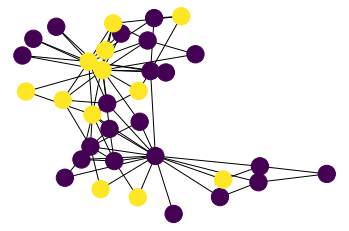

In [26]:
import matplotlib
%matplotlib inline
from pylab import *
import networkx as nx
import random as rd
import numpy as np 

p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    for i in g.nodes: #loop through all nodes
        if g.nodes[i]['state'] == 0: # if susceptible
            for j in g.neighbors(i): #consider all neighbors
                if g.nodes[j]['state'] == 1: # if neighbor j is infected
                    g.nodes[i]['state'] = 1 if random() < p_i else 0
        else: # if infected
            g.nodes[i]['state'] = 0 if random() < p_r else 1


initialize()
for i in range(1000):
    update()
observe()

Difference between asynchronous and synchronous updating: synchronous updating loops through all neighbors -> consider more chances of a node getting infected if it is currently susceptible than the asynchronous model.


Why use synchronous: we see the MFA analysis in Sayama raise the probability of the node staying susceptible to the power of (n-1) - this means we consider all n-1 neighbors' probability of infecting the node -> use synchronous.

## Task 2

In [18]:
a = nx.erdos_renyi_graph(1000,0.04)
b = nx.watts_strogatz_graph(1000,40,1)
c = nx.barabasi_albert_graph(1000, 20)

In [ ]:
def average_neighbor_degree(g):
    for i in g.nodes:
        lst_neighbor = g.neighbors(i)
        lst_degree=[]
        for j in lst_neighbor:
            lst_degree.append(g.degree(j))
    return np.mean(lst_degree)

In [29]:
#Average degree of a and average neighbor degree of a
avg_degree = 2 * a.number_of_edges() / a.number_of_nodes()
print(avg_degree, "versus neighbor average degree of", average_neighbor_degree(a))

40.028 versus neighbor average degree of 41.84848484848485


In [30]:
#Average degree of a and average neighbor degree of b
avg_degree2 = 2 * b.number_of_edges() / b.number_of_nodes()
print(avg_degree2, "versus neighbor average degree of", average_neighbor_degree(b))

40.0 versus neighbor average degree of 39.91891891891892


In [31]:
#Average degree of a and average neighbor degree of c
avg_degree3 = 2 * c.number_of_edges() / c.number_of_nodes()
print(avg_degree3, "versus neighbor average degree of", average_neighbor_degree(c))

39.2 versus neighbor average degree of 66.45
